# PHAS0031:Computational Physics: Week 1: Assessment
## Joshua Giblin-Burnham (SN.:19052055)

### Introduction:
This notebook explores scalar and vector feilds in the form of the electrostatic potential and feild for different charge arrangement; exploiting functions to calculate potentials and feilds at x,y coordinates across arrays, we then use these results to plot the potential and feild. The arrangements explored are a monopole in which we have a single charge; a dipole in which we have two oppositly charged charges; and a quadrupole with 4 equidistant, oppositely charged charges.

The electrostatic potential is the work done in moving a unit of electric charge from infinity to the specific point in an electric field. It is a scalar quantity and can be calculated from the integration of the coulombs force, giving the equation below.

Electrostatic Potential Equation: $$ \boldsymbol{V}\:(r)= \frac{q}{|\boldsymbol{r}-\boldsymbol{r_0}|^2} \qquad [1] $$

An electrostatic field is the vector field surrounding an electric charge, it describes the force experienced by a unit positive charge at the point in space and the electric field originate from an electric charges. It is given by the equation below.

Electrostatic Feild: $$ \boldsymbol{E}\: (\boldsymbol{r})= \frac{q \cdot(\boldsymbol{r}-\boldsymbol{r_0})}{|\boldsymbol{r}-\boldsymbol{r_0}|^3} \qquad[2] $$


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


import matplotlib.colors as colors
# Import colors to normalise the colour maps for potentials

### Section 1: Electrostatic Potential Function:
First, we create a function to calculate the electrostatic potential at all points in the 2D grid of x,y points created from `np.mesh`.  The function calculates equation [1] for the points given in the grid; first, it calculates the square magnitude of the distance of each point from the charge, and then divides the charge, q, by the resulting array. This thus outputs a 2D array of the calculated values. 

(Note: As we are dividing by the square magnitude of a distance this can lead to dividing by zero resulting in infinity; to deal with this these results are redacted and replaced with zero- this is the same for the feild)

In [3]:
def V(q,x0,y0,x,y):
    '''Calculate the electrostatic potential due to a charge q0 at a point (x0, y0)
    
    Inputs:
    q       Value of charge
    x0, y0  Location of charge (floats)
    x, y    Position(s) for potential to be evaluated
    '''
    magr= (x0-x)**2+(y0-y)**2
    # Calculates the square magnitude of the vector from point (x0,y0)

    magV= np.divide(q, magr, out=np.zeros_like(magr), where=magr!=0)
    # Explicitly using np.divide as to avoid division by zero when using '\'
    # The 'where' condition sets magE to zero, when magr is zero

    return magV

### Section 2: Electrostatic Field Function:
Similarly, we create a function to calculate the electrostatic feild vector at all points in the 2D grid as from before.  The function calculates equation [2] for the points given in the grid and, as the feild is a vector,outputs two results- the x and y component. The function calculates the magnitude of the distance of each point from the charge and the x/y components of the directional vector from the charge. Then it divides the charge, q, by the distance cubed and multiplies the x/y components of the directional vector by the corresponding values. This outputs two 2D array of the calculated x and y vector components. 

In [4]:
def E(q,x0,y0,x,y):
    '''
    Calculatea the electrostatic feild due to a charge q0 at a point (x0, y0)

    Inputs:
    q       Value of charge
    x0, y0  Location of charge (floats)
    x, y    Position(s) for potential to be evaluated, these are each 2D arrays
    '''
    rx=x-x0
    ry=y-y0
    magr= np.sqrt((x0-x)**2+(y0-y)**2)
    # Calculates the directional vector and the magnitude of the vector
   
    magE= np.divide(q, magr**3, out=np.zeros_like(magr), where=magr!=0)
    # Explicitly using np.divide as to avoid division by zero when using '\'
    # The 'where' condition sets magE to zero, when magr is zero
    
    Ex=magE*rx
    Ey=magE*ry

    return Ex,Ey

### Section 3: Plots:

In [27]:
# Define variables for charge(s) and positions for potential and feild plots
q1= 2
x1=y1 =np.linspace(-10,10, 51)
x,y= np.meshgrid(x1,y1)
# Create grid of x and y positions for plotting

norm = colors.SymLogNorm(linthresh=0.03, vmin=-1, vmax=1)
# Defines the normalisation for the colour mapping on the potential plots, changes from linear to a logarithmics scale

#### Monopole:
We can observe the potential plot, as it is a scalar quantity we plot the array as colour gradient signifying the strength of potential at each point. I have used a logarithmic scale to better graduate the change in potential and I have implemented bilinear interpolation to smooth the 'pixels' of the grid.

Looking at the feild plot we observe the its a vector feild; the monopole shows the positive divergence of the feild in the presents of a positive monopole; thus illistrating how charges of an electric feild act as a source of electric flux. This also shows the rotational symmetry of a monopole.

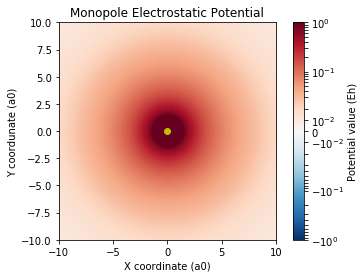

In [32]:
# Defines charge point and call function 
x0=y0=0
pot1= V(q1,x0,y0,x,y) 

# Plot scalar feild, placing zero in the centre
plot1= plt.imshow(pot1, extent=(-10,10,-10,10), cmap='RdBu_r', interpolation='bilinear',norm= norm)

# Plots charge point, colour bar and titles etc.
plt.plot(x0,y0,'yo') 
plt.xlabel('X coordinate (a0)')
plt.ylabel('Y coordunate (a0)')
plt.title('Monopole Electrostatic Potential')

cbar=plt.colorbar()
cbar.set_label('Potential value (Eh)')

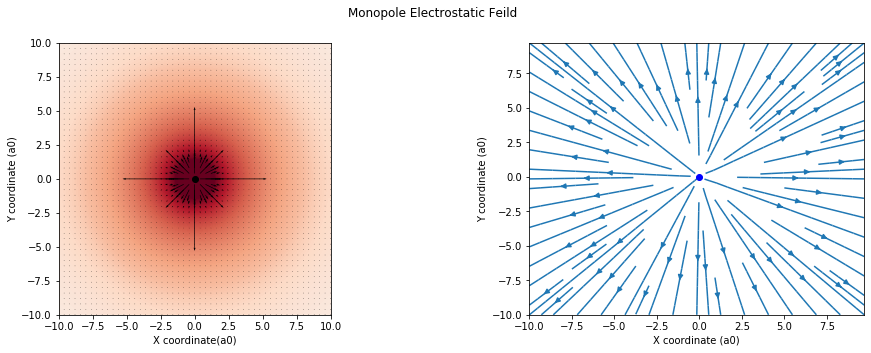

In [33]:
# Plot with stream or quiver
Ex1, Ey1 = E(q1,x0,y0,x,y)

# Creating subplot to display quiver and streamline
fig1, (fq1, fs1) = plt.subplots(1, 2, figsize=(15,5))
fig1.suptitle('Monopole Electrostatic Feild')

# Quiver subplot and labelling, layering it over the potential for visualisation
fq1.quiver(x,y,Ex1,Ey1, scale= 51)
fq1.plot(x0,y0,'ko') 
fq1.imshow(pot1, extent=(-10,10,-10,10), cmap='RdBu_r', interpolation='bilinear', norm= norm)  
fq1.set(xlabel='X coordinate(a0)',ylabel='Y coordinate (a0)')
fq1.margins(0)

# Streamline subplot and labelling
fs1.streamplot(x,y,Ex1,Ey1)
fs1.plot(x0,y0,'bo') 
fs1.set(xlabel='X coordinate (a0)',ylabel='Y coordinate (a0)')
fs1.margins(0)

plt.subplots_adjust(wspace=0.5)
plt.show(fig1)

#### Dipole:

We see for an equally charged dipole the potential and feild is symmetric,moving from positive to negative. The dipole potential/feild can simply be plotted as a linear sum of either particles potential/feild. The potential plot highlights the opposing potential of the positive and negative, we see the two cancel eachother out and at the centre the potential is zero. We observe from the feild plot, the positive charge acts as a 'source' of electric flux and the negative ats as a 'sink', therefore, all feild lines travel from the positive to the negative charge and the overal/total divergence is zero all feild.~

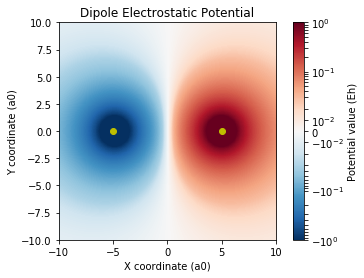

In [34]:
# Define dipole charge coordinates and call potential function
xd=[5,-5]
yd=[0,0]
dipot1= V(q1,xd[0],yd[0],x,y) 
dipot2= V(-q1,xd[1],yd[1],x,y) 

# Plot scalar feild, summing potentials
plot2= plt.imshow( dipot1+dipot2, extent=(-10,10,-10,10), cmap='RdBu_r', interpolation='bilinear', norm= norm)   

# Plots charge point, colour bar and titles etc.
plt.plot(xd,yd,'yo')  
plt.xlabel('X coordinate (a0)')
plt.ylabel('Y coordinate (a0)')
plt.title('Dipole Electrostatic Potential')

dcbar=plt.colorbar()
dcbar.set_label('Potential value (Eh)')

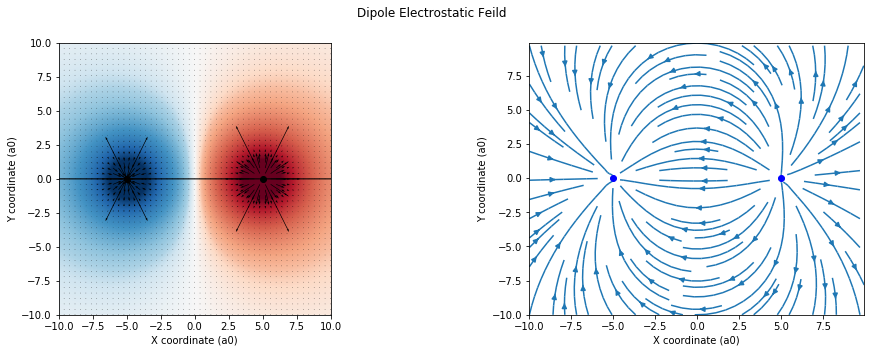

In [35]:
# Define dipole feild for each charge (summed when plotted)
dEx1, dEy1 = E(q1,xd[0],yd[0],x,y)
dEx2, dEy2 = E(-q1,xd[1],yd[1],x,y)

# Creating subplot to display quiver and streamline
fig2, (fq2, fs2) = plt.subplots(1, 2, figsize=(15,5))
fig2.suptitle('Dipole Electrostatic Feild')

# Quiver subplot and labelling, layering it over the potential for visualisation
fq2.quiver(x,y,dEx1+dEx2,dEy1+dEy2, scale= 51) 
fq2.plot(xd,yd,'ko') 
fq2.imshow(dipot1+dipot2, extent=(-10,10,-10,10), cmap='RdBu_r', interpolation='bilinear', norm= norm)  
fq2.set(xlabel='X coordinate (a0)',ylabel='Y coordinate (a0)')
fq2.margins(0)

# Streamline subplot and labelling
fs2.streamplot(x,y,dEx1+dEx2,dEy1+dEy2)
fs2.plot(xd,yd,'bo') 
fs2.set(xlabel='X coordinate (a0)', ylabel='Y coordinate (a0)')
fs2.margins(0)

plt.subplots_adjust(wspace=0.5)
plt.show(fig2)

#### Quadrupole:

For this symmetric and equidistance quadpole, we see the potential is zero along the x/y axis' as the charges cancel each other out. From the feild we see that again the total divergence is zero as equal sources as sinks. In addition, we can see how the potential around each charge is distorted, from a circle to 'squashed' elipse, by the other charges. Furthermore, we can see graduated change in potential showing equipotentials (this can also be seen on the dipole and monopole).

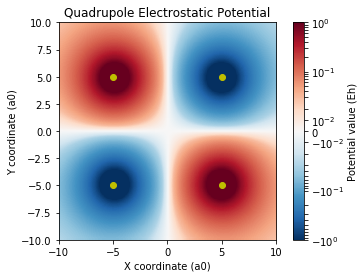

In [36]:
# Define quadrupole charge coordinates and call potential function
xq=[5,5,-5,-5]
yq=[5,-5,5,-5]

quadp1= V(q1,xq[0],yq[0],x,y) 
quadp2= V(-q1,xq[1],yq[1],x,y) 
quadp3= V(-q1,xq[2],yq[2],x,y) 
quadp4= V(q1,xq[3],yq[3],x,y) 
sumquad=quadp1+quadp2+quadp3+quadp4

# Plot scalar feild, summing potentials
plot3= plt.imshow( sumquad,extent=(-10,10,-10,10),cmap='RdBu_r', interpolation='bilinear', norm= norm)

# Plots charge point, colour bar and titles etc.
plt.plot(xq,yq,'yo')                 
plt.xlabel('X coordinate (a0)')
plt.ylabel('Y coordinate (a0)')
plt.title('Quadrupole Electrostatic Potential')

qcbar=plt.colorbar()
qcbar.set_label('Potential value (Eh)')

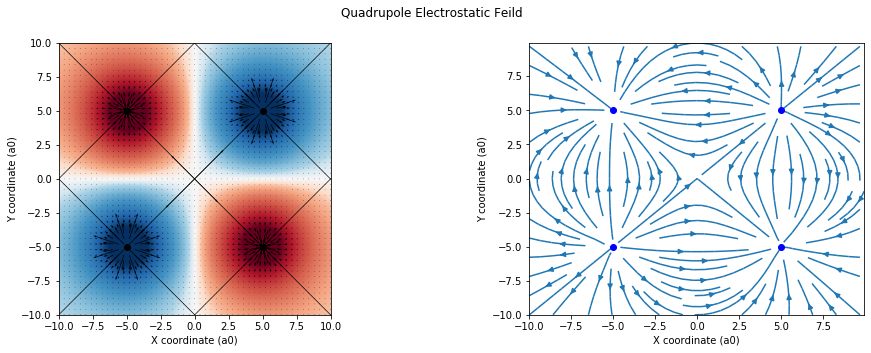

In [10]:
# Define quadrupole feild for each charge (summed when plotted)
qEx1, qEy1 = E(q1,xq[0],yq[0],x,y)
qEx2, qEy2 = E(-q1,xq[1],yq[1],x,y)
qEx3, qEy3 = E(-q1,xq[2],yq[2],x,y)
qEx4, qEy4 = E(q1,xq[3],yq[3],x,y)

# Creating subplot to display quiver and streamline
fig3, (fq3, fs3) = plt.subplots(1, 2, figsize=(15,5))
fig3.suptitle('Quadrupole Electrostatic Feild')

# Quiver subplot and labelling, layering it over the potential for visualisation
fq3.quiver(x,y,qEx1+qEx2+qEx3+qEx4,qEy1+qEy2+qEy3+qEy4, scale= 51)
fq3.plot(xq,yq,'ko') 
fq3.imshow( sumquad,extent=(-10,10,-10,10),cmap='RdBu_r', interpolation='bilinear', norm= norm)
fq3.set(xlabel='X coordinate (a0)',ylabel='Y coordinate (a0)')
fq3.margins(0)

# Streamline subplot and labelling
fs3.streamplot(x,y,qEx1+qEx2+qEx3+qEx4,qEy1+qEy2+qEy3+qEy4)
fs3.plot(xq,yq,'bo') 
fs3.set(xlabel='X coordinate (a0)',ylabel='Y coordinate (a0)')
fs3.margins(0)

plt.subplots_adjust(wspace=0.5)
plt.show(fig3)

### Conclusions:
In conclusion, we have effectively explored both scalar and vector feilds, I have explored manipulating colour mapping to show a scalar feild and the effects of summing them; used `np.mesh` to create 2D arrays of x and y coordinates and passing a function on them to produce a vector feild; and most prevailently learnt simplicity, below are my original potential functions usig for loops to act on each component of the array, however, this was a much more complicated way to produce the same result as above. Sometimes its easy to overcomplicate a task and this was a good example of using pythons most efficent approaches instead.

In [11]:
def Vpot(q,x0,y0,x,y):
    '''calculate the electrostatic potential due to a charge q0 at a point (x0, y0)
    
    Inputs:
    q       Value of charge
    x0, y0  Location of charge (floats)
    x, y    Position(s) for potential to be evaluated
    '''
    r=np.zeros([len(x),len(x[0])])
    
    for i, u in enumerate(x):
        for j,v in enumerate(y):
            r[j,i]= np.sqrt((x0-u[i])**2+(y0-v[j])**2)
    
    magV= np.divide(q, magr, out=np.zeros_like(magr), where=magr!=0)
    
    return magV

In [12]:
def Efeild(q,x0,y0,x,y):
    '''
    Calculatea the electrostatic feild due to a charge q0 at a point (x0, y0)

    Inputs:
    q       Value of charge
    x0, y0  Location of charge (floats)
    x, y    Position(s) for potential to be evaluated
    '''
    rx=r=np.zeros([len(x),len(x[0])])
    ry=np.zeros([len(x),len(x[0])])
    magr=np.zeros([len(x),len(x[0])])
    
    for i, u in enumerate(x):
        for j,v in enumerate(y):
            rx[j,i]=u[i]-x0
            ry[j,i]=v[j]-y0
            magr[j,i]= np.sqrt((x0-u[i])**2+(y0-v[j])**2)
    
    magE= np.divide(q, magr**3, out=np.zeros_like(magr), where=magr!=0)
    
    Ex=magE*rx
    Ey=magE*ry

    return Ex,Ey